<a href="https://colab.research.google.com/github/prw09/zomato_eda/blob/main/Zomato_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Zomato data .csv')

In [3]:
data.head(6)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet


In [4]:
data.shape

(148, 7)

In [5]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [8]:
# Convert the datatype of column of rate

def handlerate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)

data['rate'] = data['rate'].apply(handlerate)
data[['rate']].head()

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [12]:
data.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [29]:
# Type of restaturant

data.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes


Text(0.5, 0, 'type of restaurant')

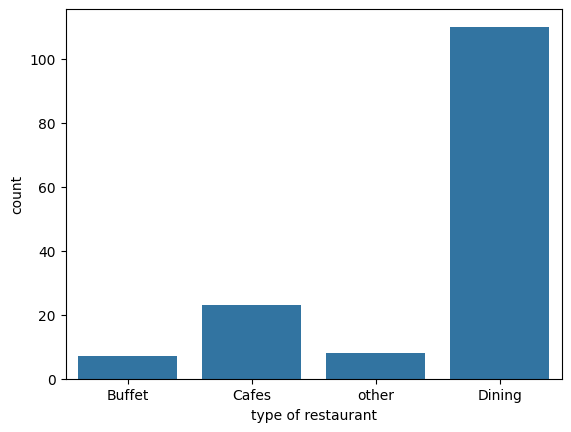

In [14]:
sns.countplot(x = data['listed_in(type)'])
plt.xlabel('type of restaurant')

In [23]:
x = data['listed_in(type)'].value_counts()
x

,count
listed_in(type),
Dining,110
Cafes,23
other,8
Buffet,7


Text(0, 0.5, 'vote')

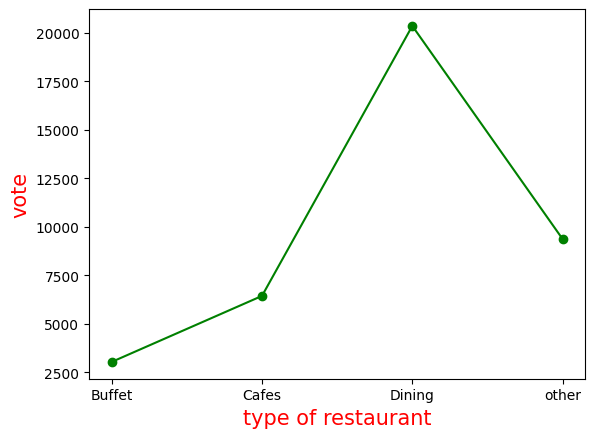

In [28]:
grouped_data = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'vote': grouped_data})
plt.plot(result, c = 'green', marker = 'o')
plt.xlabel('type of restaurant', c='red', size = 15)
plt.ylabel('vote', c='red', size = 15)

In [33]:
data['rate'].groupby(data['listed_in(type)'])

,rate
listed_in(type),
Buffet,26.9
Cafes,86.6
Dining,392.9
other,31.3


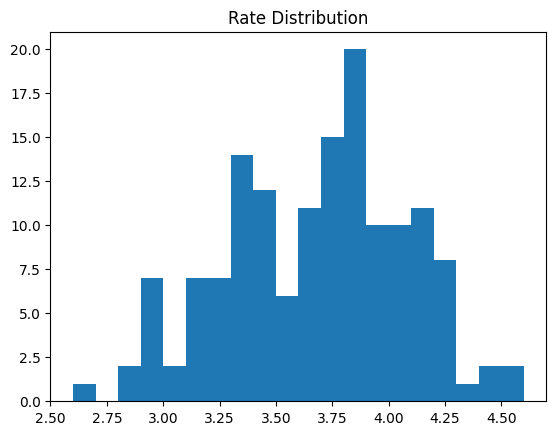

In [37]:
plt.hist(data['rate'], bins = 20)
plt.title("Rate Distribution")
plt.show()

In [45]:
data['approx_cost(for two people)'].value_counts()

,count
approx_cost(for two people),
300,23
200,16
150,16
400,15
500,14
600,13
800,12
100,6
450,6


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

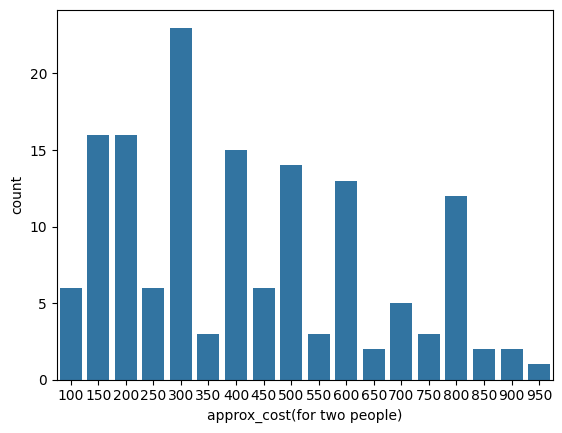

In [46]:
sending_data = data['approx_cost(for two people)']
sns.countplot(x = sending_data)